<a href="https://colab.research.google.com/github/shreyansh273/GTx_6501/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving temps.txt to temps.txt


In [5]:
uploaded = files.upload()

Saving uscrime.txt to uscrime.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
temp = pd.read_csv("temps.txt", sep='\t')
crime = pd.read_csv("uscrime.txt", sep='\t')

In [5]:
temp.head()

,DAY,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1-Jul,98,86,91,84,89,84,90,73,82,91,93,95,85,95,87,92,105,82,90,85
1,2-Jul,97,90,88,82,91,87,90,81,81,89,93,85,87,90,84,94,93,85,93,87
2,3-Jul,97,93,91,87,93,87,87,87,86,86,93,82,91,89,83,95,99,76,87,79
3,4-Jul,90,91,91,88,95,84,89,86,88,86,91,86,90,91,85,92,98,77,84,85
4,5-Jul,89,84,91,90,96,86,93,80,90,89,90,88,88,80,88,90,100,83,86,84


In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [10]:
SimpleExpSmoothing(temp['1996']).fit().fittedvalues()

TypeError: ignored

In [7]:
crime.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


In [13]:
cols = crime.columns

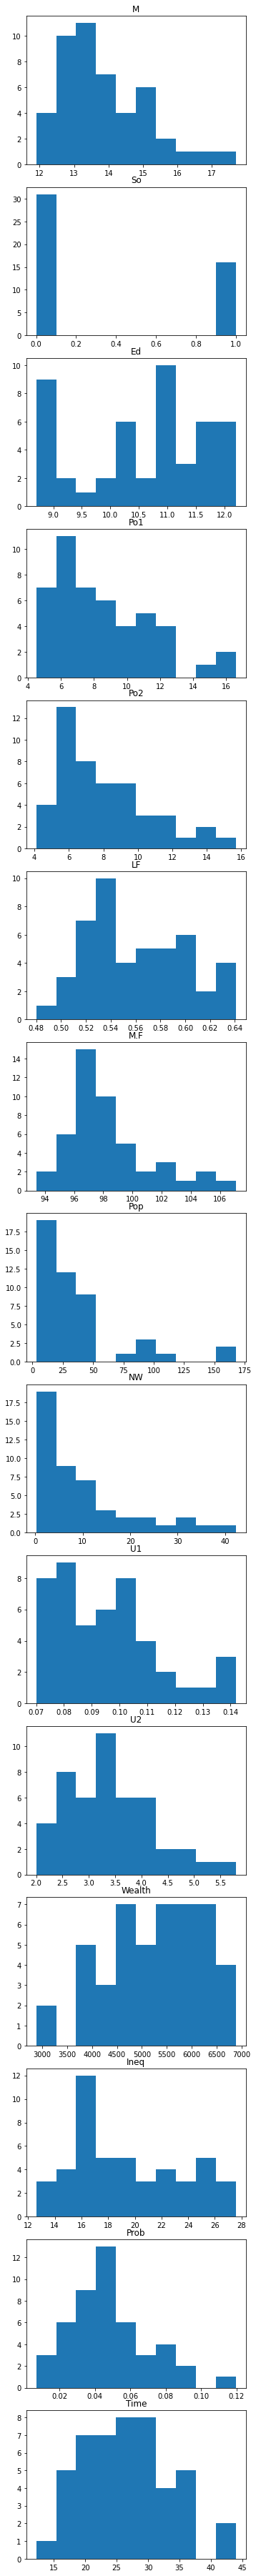

In [32]:
n_rows = 15
fig, ax = plt.subplots(n_rows,figsize=(5,50))
fig.tight_layout()
for i in range(n_rows):
  ax[i].hist(crime[cols[i]])
  ax[i].set_title(cols[i])

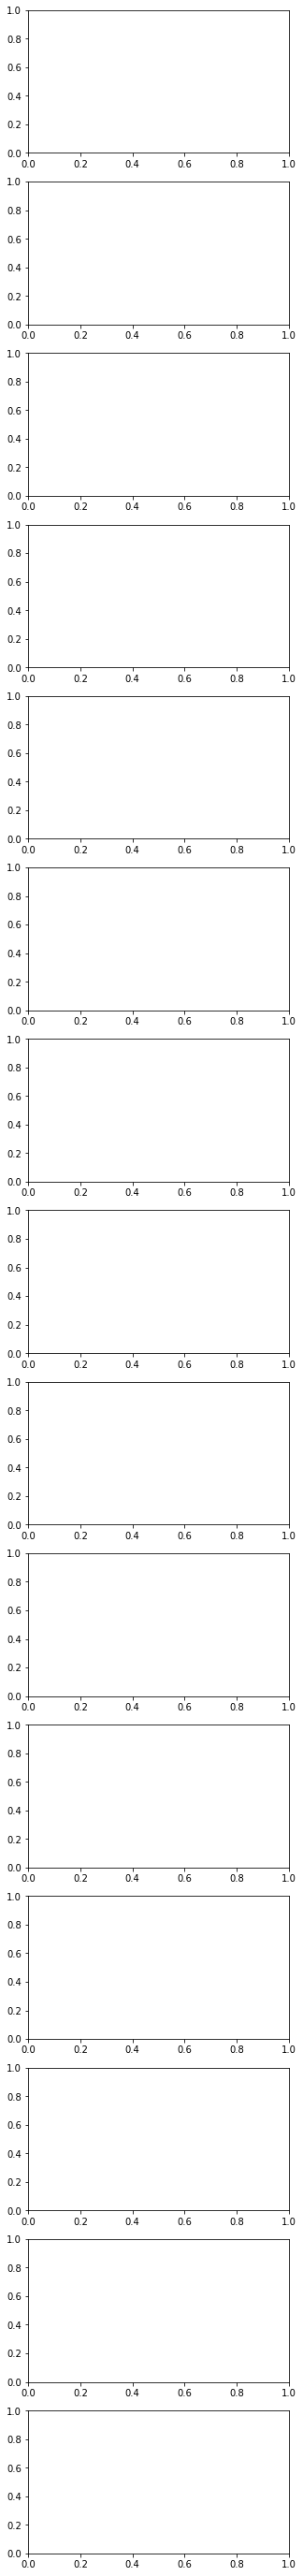

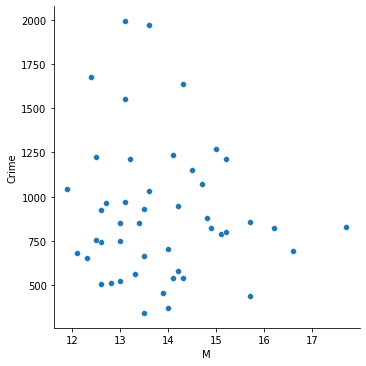

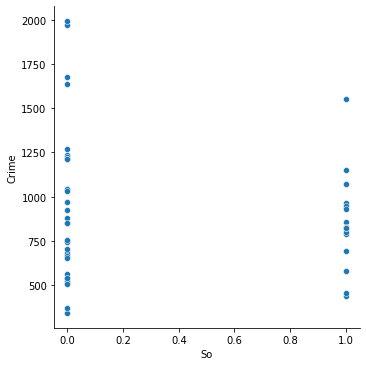

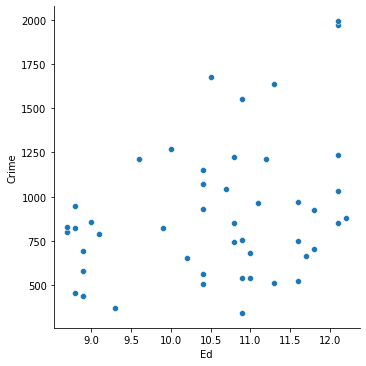

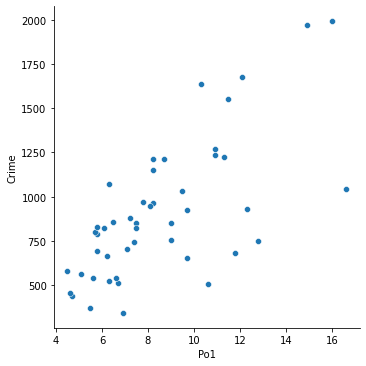

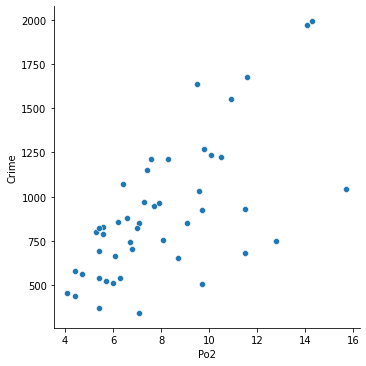

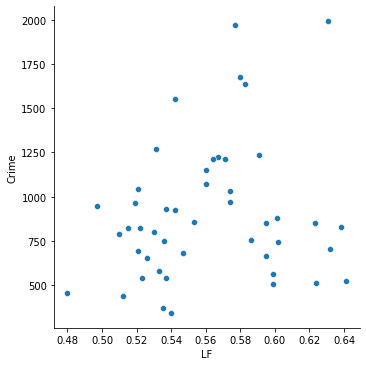

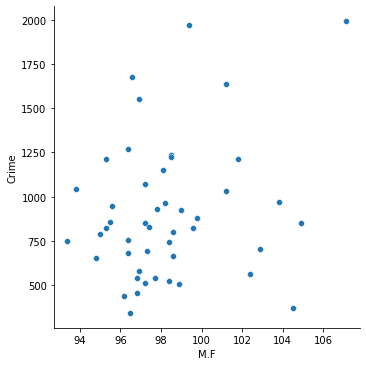

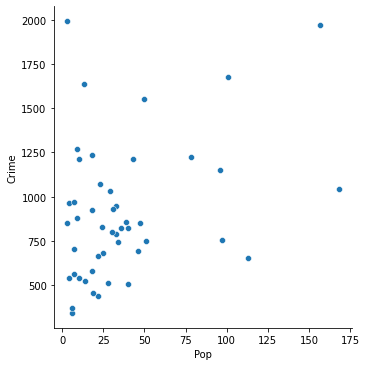

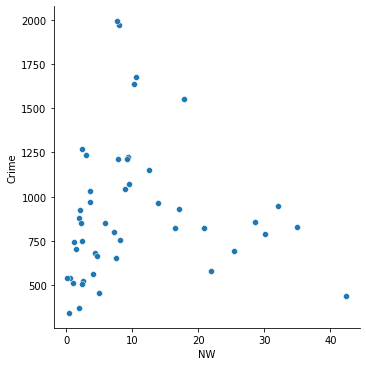

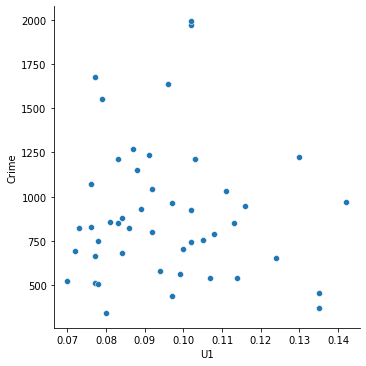

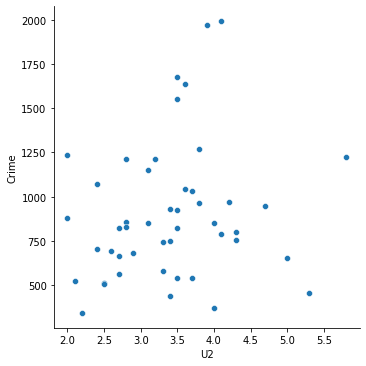

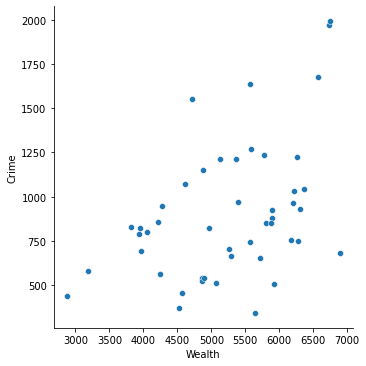

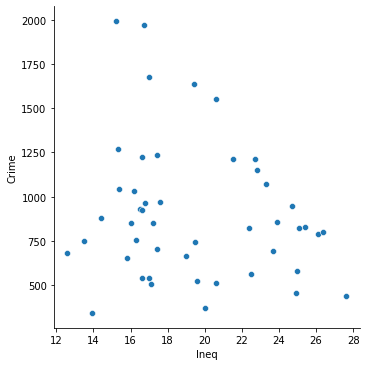

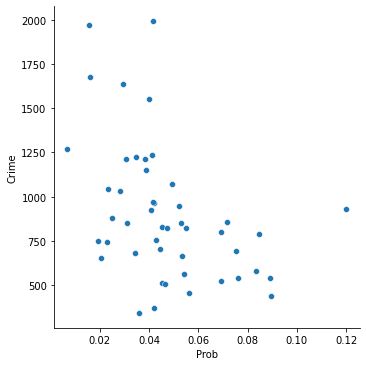

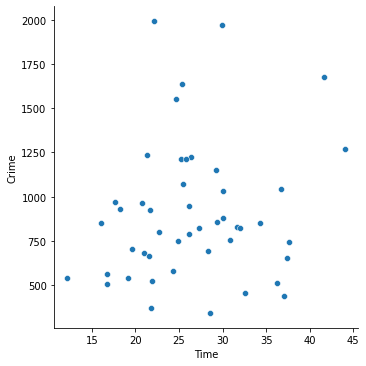

In [33]:
n_rows = 15
ax, fig= plt.subplots(n_rows, 1, figsize=(5, 50))
for i in range(n_rows):
  sns.relplot(x=cols[i], y="Crime", data=crime, kind='scatter')

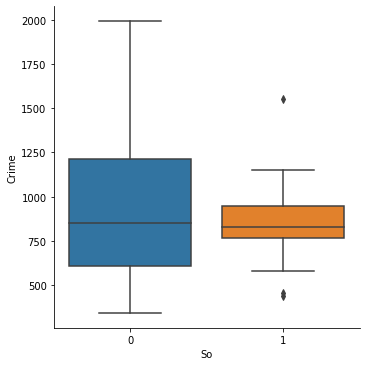

In [36]:
sns.catplot(x="So", y="Crime", data=crime, kind="box")

In [37]:
X = crime.drop("Crime", axis=1)
y = crime["Crime"]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [57]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
linreg_pred = linreg.predict(X_test_scaled)

In [58]:
print(linreg.score(X_train_scaled, y_train))
print(linreg.score(X_test_scaled, y_test))
print(r2_score(y_test, linreg_pred))

0.6555960693548581
0.8553863152253323
0.8553863152253323


In [63]:
model_results = pd.DataFrame({'name':crime.columns[0:len(crime.columns)-1], 'coef':linreg.coef_})

In [64]:
model_results

,name,coef
0,M,210.859512
1,So,-10.589861
2,Ed,617.148171
3,Po1,2274.782111
4,Po2,-1087.046337
5,LF,-98.013472
6,M.F,272.584403
7,Pop,-328.122714
8,NW,246.458834
9,U1,-348.768537
